# 1. Introduction

In [1]:
# NLP: Field concerned with the ability of computer to understand, analyze, manipulate and potentially generate human language.

In [2]:
# Examle:
#     Email spam filter
#     Auto complete: in google search
#     Auto correct

In [3]:
# Area of NLP:
#     sentiment analysis
#     topic modeling
#     text classification
#     Parts of sppech tagging

# 2 NLTK

In [4]:
# Core component of NLP is extracting all information from a block of text that is relevent to computer 
# understanding the language

In [5]:
# NLTK is open source tools created to make NLP process in python easier to build

In [6]:
import nltk

In [7]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
dir(nltk)

['AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyGrammar',
 'DependencyGrap

In [9]:
from nltk.tokenize import word_tokenize
input_text = "I am learning NLP and using NLTK"
word_tokens = word_tokenize(input_text)
word_tokens

['I', 'am', 'learning', 'NLP', 'and', 'using', 'NLTK']

# 3. Structured and Untractured

In [11]:
# Structured data:
#     Highly organiged
#     well formatted
#     Easily searchable in relational DB
    
#     eg: names, dates, stack_info, purches_history etc

In [12]:
# Unstractured data:
#     no pre-defined format
#     Difficult to process, collect, analyze
    
#     eg: tweets of user, text, video, audio, social media activity, surveillance imagery

# 4. Reading Text data

In [13]:
# Reading Text data:

In [14]:
# method 1: read data

In [15]:
raw_data  = open("SMSSpamCollection").read()
raw_data[:500]

"ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\nham\tOk lar... Joking wif u oni...\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tU dun say so early hor... U c already then say...\nham\tNah I don't think he goes to usf, he lives around here though\nspam\tFreeMsg Hey there darling it's been 3 week's now and no word bac"

In [16]:
parsed_data = raw_data.replace('\t', '\n').split('\n')
parsed_data[:10]

['ham',
 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
 'ham',
 'Ok lar... Joking wif u oni...',
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham',
 'U dun say so early hor... U c already then say...',
 'ham',
 "Nah I don't think he goes to usf, he lives around here though"]

In [17]:
label_list = parsed_data[::2]
msg_list = parsed_data[1::2]
print(label_list[:5])
print(msg_list[:5])

['ham', 'ham', 'spam', 'ham', 'ham']
['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...', "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", 'U dun say so early hor... U c already then say...', "Nah I don't think he goes to usf, he lives around here though"]


In [18]:
import pandas as pd
combined_df = pd.DataFrame({
    'label': label_list[-1], # last label is empty
    'sms': msg_list
})
combined_df.head()

,label,sms
0,,"Go until jurong point, crazy.. Available only ..."
1,,Ok lar... Joking wif u oni...
2,,Free entry in 2 a wkly comp to win FA Cup fina...
3,,U dun say so early hor... U c already then say...
4,,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
# method 2: read data

In [20]:
dataset = pd.read_csv("SMSSpamCollection", sep="\t", header=None)
dataset.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 5. Exploring dataset

In [22]:
dataset.columns = ['label', 'sms'] # add column name
dataset.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
# check how many row are there
print(f"input dataset has {len(dataset)} rows, {len(dataset.columns)} columns")

input dataset has 5572 rows, 2 columns


In [24]:
dataset.shape

(5572, 2)

In [25]:
# check label. spam/ham
print(f"ham = {len(dataset[dataset['label']=='ham'])}")
print(f"spam = {len(dataset[dataset['label']=='spam'])}")

ham = 4825
spam = 747


In [26]:
dataset['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [27]:
# missing data
print(f"Number of missing label = {dataset['label'].isnull().sum()}")
print(f"Number of missing sms = {dataset['sms'].isnull().sum()}")

Number of missing label = 0
Number of missing sms = 0


# 6. NLP Pipeline

In [28]:
# NLP Pipeline:
#     Raw Data => Tokenization => Text Cleaning => Vectorization => ML Algorithm => Spam Filter

# Text cleaning => remove stop word. Eg: I, am, in. 
#                     Stemming: remove prefix and suffix. ing, ly
# vectorization: convert word to numeric representation.
#                 there are many type of vectorization
#                     word2vec
#                     bagofword
#                     TF-IDF

# 7. Preprocessing

In [29]:
# Preprocessing = Tokenization + Text Cleaning
#     Remove Puntuation  eg: . , ! etc
#     Tokenization  eg: ['I', 'am', 'learning']
#     Remove stop words  eg: am is the
#     Stemming/ Lemmatizing eg: coder, coding to code(stemm), remove prefix and sufix ing. ly (Lemma) 

In [30]:
import pandas as pd

In [31]:
pd.set_option('display.max_colwidth', 100)
data = pd.read_csv("SMSSpamCollection", sep='\t', header=None)
data.columns = ['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [32]:
# Remove puntuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
def remove_puntuation(txt):
    txt_nopunct = ''.join([i for i in txt if i not in string.punctuation])
    return txt_nopunct

In [34]:
data['msg_clean'] = data['msg'].apply(lambda x: remove_puntuation(x))

In [35]:
data.head()

,label,msg,msg_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though


# 8. Tokenization

In [37]:
import re

def tokenize(txt):
    tokens = re.split('\W+', txt)  # non word charecter, w word charecter.
    return tokens

In [38]:
data['msg_clean_tokenized'] = data['msg_clean'].apply(lambda x:tokenize(x.lower()))
data.head()

,label,msg,msg_clean,msg_clean_tokenized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"


# 9. remove stop words

In [40]:
import nltk
stopwords = nltk.corpus.stopwords.words("english")
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [41]:
def remove_stopwords(txt_tokenized):
    txt_clean = [word for word in txt_tokenized if word not in stopwords]
    return txt_clean

In [42]:
data["msg_no_stopword"] = data['msg_clean_tokenized'].apply(lambda x:remove_stopwords(x))
data.head()

,label,msg,msg_clean,msg_clean_tokenized,msg_no_stopword
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


# 10. Stemming

In [43]:
# stemming: find root word
# Error in stemming:
#     Overstamming:
#         Too much word is cut-off(meaning lost) #eg: university, universities, universal, universe consider same word
#         2 words of different stems reduced to same stem
#     Understemming:
#         2 words of same stem mapped to different stems eg; data and datum consider 2 different stem dat, datu

# Adv:
#     Reduces the corpus of words the model need to work with
#     Explicitly correlates words with similar meaning

# different types of stemmer:
#     Porter stemmer
#     Snowball stemmer
#     Lancaster stammer
#     Regex-based Stemmer

# 11.  Porter Stemmer

In [45]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [46]:
print(ps.stem('coder'))
print(ps.stem('codeing'))
print(ps.stem('code'))

coder
code
code


In [47]:
print(ps.stem('data'))
print(ps.stem('datum'))

data
datum


In [48]:
print(ps.stem('bowl'))
print(ps.stem('bowling'))
print(ps.stem('bowler'))

bowl
bowl
bowler


In [49]:
data.head()

,label,msg,msg_clean,msg_clean_tokenized,msg_no_stopword
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"


In [50]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text ]
    return text

In [51]:
data['msg_stemmed'] = data['msg_no_stopword'].apply(lambda x: stemming(x))
data.head()

,label,msg,msg_clean,msg_clean_tokenized,msg_no_stopword,msg_stemmed
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amo...,"[go, until, jurong, point, crazy, available, only, in, bugis, n, great, world, la, e, buffet, ci...","[go, jurong, point, crazy, available, bugis, n, great, world, la, e, buffet, cine, got, amore, wat]","[go, jurong, point, crazi, avail, bugi, n, great, world, la, e, buffet, cine, got, amor, wat]"
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[u, dun, say, so, early, hor, u, c, already, then, say]","[u, dun, say, early, hor, u, c, already, say]","[u, dun, say, earli, hor, u, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"


# 12 Lemmatization

In [52]:
# Lemmatization:
#     Process of grouping together the inflected forms of a word to be analyzed as a single root word or lemma
#     Unlike Stemming , it reduces the inflected words properly ensuring that the root word belong to the language
#     A lemma is canonical form, dictionary form or citation form of set of words

In [53]:
# Stemming vs lemmatization
# stemming: is faster
#     simply chops off the end of word using heuristics
#     no understanding of the context
# Lemmatization: is typically more accurate
#     uses more informed analysis
#     always reduces to a dictionary word
#     More accurate but computationally expensive
    

## 13. WordNetLemmatizer

In [55]:
import nltk
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [56]:
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [57]:
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


In [58]:
print(wn.lemmatize('cactus'))
print(wn.lemmatize('cacti'))

cactus
cactus


In [59]:
print(ps.stem('cactus'))
print(ps.stem('cacti'))

cactu
cacti


In [60]:
# read raw text

In [61]:
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)
stopwords = nltk.corpus.stopwords.words("english")
data = pd.read_csv("SMSSpamCollection", sep='\t', header=None)
data.columns = ['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [62]:
# clean text
def clean_txt(txt):
    txt = txt_nopunct = ''.join([i for i in txt if i not in string.punctuation])
    tokens = re.split('\W+', txt)
    txt = [word for word in tokens if word not in stopwords]
    return txt

In [63]:
data['msg_nostop'] = data['msg'].apply(lambda x: clean_txt(x))
data.head()

,label,msg,msg_nostop
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]"


In [64]:
# lemmatization
def lemmatization(token_txt):
    text = [wn.lemmatize(word) for word in token_txt]
    return text

In [65]:
data['msg_lemmatized'] = data['msg_nostop'].apply(lambda x : lemmatization(x))
data.head()

,label,msg,msg_nostop,msg_lemmatized
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]","[Go, jurong, point, crazy, Available, bugis, n, great, world, la, e, buffet, Cine, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...","[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]","[Nah, I, dont, think, go, usf, life, around, though]"


# 14. Vectorization

In [66]:
# Vectorization:
#     Process of encoding text as integers to ceate Feature Vector
#     Feature Vector: vector of numerical features that represent an object
# Types:
#     count vectorization
#     N-gram
#     TF-IDF

In [67]:
# Count vectorization:
# w1 w2 w3 ... w100  label
# 0  1  2       0      0
# 2  0  1       1      1

# 15. Count Vectorization

In [69]:
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)
stopwords = nltk.corpus.stopwords.words("english")
data = pd.read_csv("SMSSpamCollection", sep='\t', header=None)
data.columns = ['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [70]:
# clean text
def clean_text(txt):
    txt = ''.join([i for i in txt if i not in string.punctuation])
    tokens = re.split('\W+', txt)
    txt = [word for word in tokens if word not in stopwords]
    return txt

In [71]:
# count vectorization

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
cv =  CountVectorizer()
corpus = ["This is s sentence is",
          "This is a another sentence",
          "third document is here"]
X = cv.fit(corpus)
print(X.vocabulary_)
print(cv.get_feature_names())

X = cv.transform(corpus)
print(X.shape)
print(X.toarray())

{'this': 6, 'is': 3, 'sentence': 4, 'another': 0, 'third': 5, 'document': 1, 'here': 2}
['another', 'document', 'here', 'is', 'sentence', 'third', 'this']
(3, 7)
[[0 0 0 2 1 0 1]
 [1 0 0 1 1 0 1]
 [0 1 1 1 0 1 0]]


In [73]:
df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
df

,another,document,here,is,sentence,third,this
0,0,0,0,2,1,0,1
1,1,0,0,1,1,0,1
2,0,1,1,1,0,1,0


In [74]:
# counter vectorization on SMSSpamCollection

In [75]:
cv1 = CountVectorizer(analyzer=clean_text)

X = cv1.fit_transform(data['msg'])
print(X.shape)

(5572, 11525)


In [76]:
print(cv1.get_feature_names())

['', '0', '008704050406', '0089my', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796XXXXXX', '07973788240', '07XXXXXXXXX', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18s', '0870', '0870062117015

In [77]:
# create sample data
data_sample = data[:10]
cv2 = CountVectorizer(analyzer=clean_text)

X = cv2.fit_transform(data_sample['msg'])
print(X.shape)

(10, 137)


In [78]:
df = pd.DataFrame(X.toarray(), columns=cv2.get_feature_names())
df

,08002986030,08452810075over18s,09061701461,11,12,150,2,2005,21st,3,...,u,usf,valued,wat,weeks,wif,win,wkly,word,world
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,0,1,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 16. N-Grams Vectorization

In [79]:
# N-Grams Vectorization: creates a document-term matrix
#     Columns represent all columns of adjacent word of length n
#     cell represent count
    
#     I am studing NLP
#     bigram(n=2)    : "i am",              "am studing",           "studing NLP"
#     trigram(n=3)   : "I am studing",      "am studing NLP"
#     4 gram(n=4)    : "I am studing NLP"

In [80]:
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)
stopwords = nltk.corpus.stopwords.words("english")
data = pd.read_csv("SMSSpamCollection", sep='\t', header=None)
data.columns = ['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [81]:
# clean text
def clean_text(txt):
    txt = ''.join([i for i in txt if i not in string.punctuation])
    tokens = re.split('\W+', txt)
    txt = " ".join([word for word in tokens if word not in stopwords])
    return txt

In [82]:
data['msg_clean'] = data['msg'].apply(lambda x: clean_text(x))
data.head()

,label,msg,msg_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",Go jurong point crazy Available bugis n great world la e buffet Cine got amore wat
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry 2 wkly comp win FA Cup final tkts 21st May 2005 Text FA 87121 receive entry questions...
3,ham,U dun say so early hor... U c already then say...,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think goes usf lives around though


In [83]:
# n-gram

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
cv =  CountVectorizer(ngram_range=(2,2))
corpus = ["This is s sentence is",
          "This is a another sentence",
          "third document is here"]


X = cv.fit_transform(corpus)
print(X.shape)
print(X.toarray())

(3, 8)
[[0 0 0 0 1 1 0 1]
 [1 0 1 0 0 0 0 1]
 [0 1 0 1 0 0 1 0]]


In [85]:
df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names())
df

,another sentence,document is,is another,is here,is sentence,sentence is,third document,this is
0,0,0,0,0,1,1,0,1
1,1,0,1,0,0,0,0,1
2,0,1,0,1,0,0,1,0


In [86]:
# n-gram vectorization on SMSSpamCollection

In [87]:
cv1 = CountVectorizer(ngram_range=(2,2)) # (2,3) bygram and trigram both

X = cv1.fit_transform(data['msg_clean'])
print(X.shape)

(5572, 34931)


In [88]:
print(cv1.get_feature_names())

['008704050406 sp', '0089my last', '0121 2025050', '01223585236 xx', '01223585334 cum', '0125698789 ring', '02 user', '020603 2nd', '020603 this', '0207 153', '02072069400 bx', '02073162414 costs', '02085076972 reply', '020903 this', '021 3680', '021 3680offer', '050703 tcsbcm4235wc1n3xx', '06 good', '07046744435 arrange', '07090298926 reschedule', '07099833605 reschedule', '07123456789 87077', '0721072 find', '07732584351 rodger', '07734396839 ibh', '07742676969 shows', '07753741225 shows', '0776xxxxxxx uve', '077xxx won', '07801543489 guaranteed', '07808 xxxxxx', '07808247860 shows', '07808726822 awarded', '07815296484 shows', '0784987 shows', '0789xxxxxxx today', '0796xxxxxx today', '07973788240 shows', '07xxxxxxxxx 2000', '07xxxxxxxxx shows', '0800 0721072', '0800 169', '0800 18', '0800 195', '0800 1956669', '0800 505060', '0800 542', '08000407165 18', '08000776320 reply', '08000839402 2stoptx', '08000839402 2stoptxt', '08000839402 call', '08000839402 call2optout4qf2', '08000839402

In [89]:
# create sample data
data_sample = data[:10]
cv2 = CountVectorizer(ngram_range=(2,2))

X = cv2.fit_transform(data_sample['msg_clean'])
print(X.shape)

(10, 126)


In [90]:
df = pd.DataFrame(X.toarray(), columns=cv2.get_feature_names())
df

,09061701461 claim,11 months,12 hours,150 rcv,2005 text,21st may,87121 receive,900 prize,aids patent,already say,...,valued network,vettam set,weeks word,wif oni,win fa,winner as,wkly comp,word back,world la,xxx std
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,1
6,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,1,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 17. TF-IDF vectorization

In [91]:
# TF-IDF vectorization:
#     creates document-term matix
#         columns are individual unique words
#         cells contain weight which signifies how important a word is for an individual text message
        
        
#     w = tf * log(N/df)
#     w =weight
#     tf = occurance of word in a sentence
#     log(N/df) = occurrance of word in document
    
#     I am studing NLP.
#     tf of 'am' = 1/4 =0.25
#     N=200
#     df is am present in 2 document = 2
#     w = 0.25 * log(200/2)

In [92]:
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth', 100)
stopwords = nltk.corpus.stopwords.words("english")
data = pd.read_csv("SMSSpamCollection", sep='\t', header=None)
data.columns = ['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [93]:
# clean text
def clean_text(txt):
    txt = ''.join([i for i in txt if i not in string.punctuation])
    tokens = re.split('\W+', txt)
    txt = [word for word in tokens if word not in stopwords]
    return txt

In [94]:
# tf-idf vectorizer

In [95]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
corpus = ["This is s sentence is",
          "This is a another sentence",
          "third document is here"]

X = tfidf_vect.fit(corpus)
print(X.vocabulary_)
print(tfidf_vect.get_feature_names())


X = tfidf_vect.transform(corpus)
print(X.shape)
print(X.toarray())

{'this': 6, 'is': 3, 'sentence': 4, 'another': 0, 'third': 5, 'document': 1, 'here': 2}
['another', 'document', 'here', 'is', 'sentence', 'third', 'this']
(3, 7)
[[0.         0.         0.         0.73941068 0.47606294 0.
  0.47606294]
 [0.63174505 0.         0.         0.37311881 0.4804584  0.
  0.4804584 ]
 [0.         0.54645401 0.54645401 0.32274454 0.         0.54645401
  0.        ]]


In [96]:
df = pd.DataFrame(X.toarray(), columns=tfidf_vect.get_feature_names())
df

,another,document,here,is,sentence,third,this
0,0.000000,0.000000,0.000000,0.739411,0.476063,0.000000,0.476063
1,0.631745,0.000000,0.000000,0.373119,0.480458,0.000000,0.480458
2,0.000000,0.546454,0.546454,0.322745,0.000000,0.546454,0.000000


In [97]:
# tf-idf vectorization on SMSSpamCollection

In [98]:
# create sample data
data_sample = data[:10]
tfidf2 = TfidfVectorizer(analyzer=clean_text)

X = tfidf2.fit_transform(data_sample['msg'])
print(X.shape)

(10, 137)


In [99]:
df = pd.DataFrame(X.toarray(), columns=tfidf2.get_feature_names())
df

,08002986030,08452810075over18s,09061701461,11,12,150,2,2005,21st,3,...,u,usf,valued,wat,weeks,wif,win,wkly,word,world
0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.25,0.000000,0.000000,0.000000,0.000000,0.000000,0.25
1,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.408248,0.000000,0.000000,0.00,0.000000,0.408248,0.000000,0.000000,0.000000,0.00
2,0.00000,0.193446,0.000000,0.00000,0.000000,0.000000,0.193446,0.193446,0.193446,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.193446,0.193446,0.000000,0.00
3,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.333333,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
5,0.00000,0.000000,0.000000,0.00000,0.000000,0.231109,0.000000,0.000000,0.000000,0.231109,...,0.000000,0.000000,0.000000,0.00,0.231109,0.000000,0.000000,0.000000,0.231109,0.00
6,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
7,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
8,0.00000,0.000000,0.225174,0.00000,0.225174,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.225174,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
9,0.21594,0.000000,0.000000,0.21594,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00


# 18. Feature Engineering

In [100]:
# Feature Engineering:
#  Creating a new features of transforming existing features using domain knowledge of the data, that makes ML algo work better
#     metrics:
#     length of documents
#     avg word size within a document
#     use a punctuation in the text
#     capitalize of words in a document
    
# Transformation: Appling some transformations of data can make it work better
#     Power transformation. x^2, root(x)
#     Standardizing Data
#     Normalization: bring different features to similar scale
    

# 19. Feature Creation

In [102]:
# Message Length
# punctuation usage

# Stop word usage
# Capitalization usage 
# avg word length

In [103]:
import pandas as pd
data = pd.read_csv("SMSSpamCollection", sep='\t', header=None)
data.columns = ['label', 'msg']
data.head()

,label,msg
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [104]:
# Create Feature: message length

In [105]:
data['msg_len'] = data['msg'].apply(lambda x: len(x))
data.head()

,label,msg,msg_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives around here though",61


In [106]:
# Create Feature: punctuation usage

In [107]:
import string
def punctuation_count(txt):
    count = sum([1 for i in txt if i in string.punctuation])
    return 100 * count/len(txt)

data['punctuation_percent'] = data['msg'].apply(lambda x:punctuation_count(x))
data.head()

,label,msg,msg_len,punctuation_percent
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there g...",111,8.108108
1,ham,Ok lar... Joking wif u oni...,29,20.689655
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,155,3.870968
3,ham,U dun say so early hor... U c already then say...,49,12.244898
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,3.278689


20.

In [108]:
# Feature Evalution

In [109]:
# Evaluted Created Feature

In [110]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

In [111]:
# plot message length for spam and ham

c:\users\biman.pal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
c:\users\biman.pal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


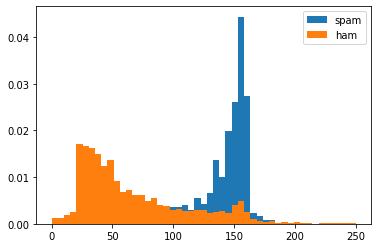

In [112]:
bins = np.linspace(0,250,50)
pyplot.hist(data[data['label']=='spam']['msg_len'], bins, label='spam', normed=True)
pyplot.hist(data[data['label']=='ham']['msg_len'], bins, label='ham', normed=True)
pyplot.legend()
pyplot.show()

In [113]:
# Evaluate punctuation percentage

c:\users\biman.pal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
c:\users\biman.pal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


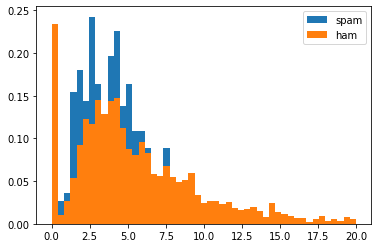

In [114]:
bins = np.linspace(0,20,50)
pyplot.hist(data[data['label']=='spam']['punctuation_percent'], bins, label='spam', normed=True)
pyplot.hist(data[data['label']=='ham']['punctuation_percent'], bins, label='ham', normed=True)
pyplot.legend()
pyplot.show()

# 21. Power Transformation

In [115]:
# Power Transformation:
#     Changing each data point in a certain column to make the distribution look closer to a normal distribution

# Tukey Transformation:
#          x^lambda , lambda>0
#     y =  log(x),    lambda=0
#          -(x^lambda) lambda<0

# Box-cox Transformation:
#     y = ((x^lambda-1)/lambda) , lambda not= 0
#         log(x) ,                lambda=0
        
# Transformation Process:
#     Determine range of exponent to text
#     Apply transformation to each value of the chossen feature
#     Determine which transformation yeild best distribution.eg:plot histogram and pick which looks closer to normal distribution

In [116]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

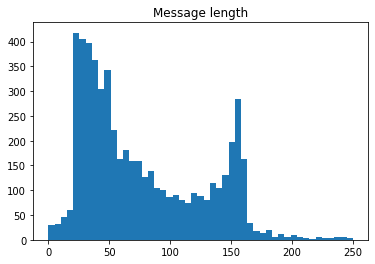

In [117]:
bins = np.linspace(0,250,50)
pyplot.hist(data['msg_len'], bins)
pyplot.title("Message length")
pyplot.show()

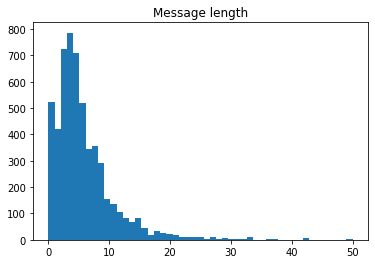

In [118]:
bins = np.linspace(0,50,50)
pyplot.hist(data['punctuation_percent'], bins)
pyplot.title("Message length")
pyplot.show()

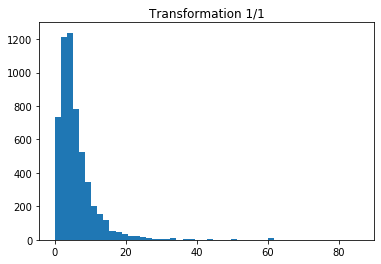

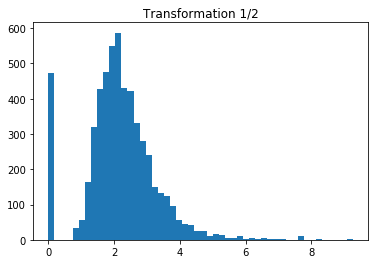

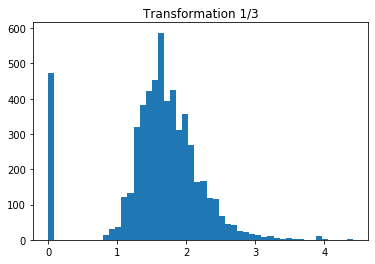

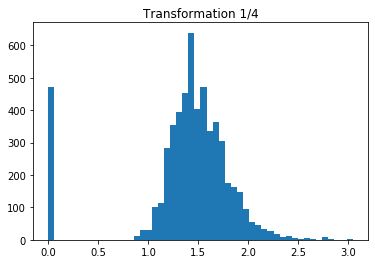

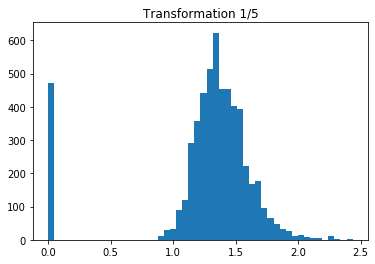

In [119]:
for i in [1,2,3,4,5]:
    pyplot.hist((data['punctuation_percent'])**(1/i), bins=50)
    pyplot.title(f"Transformation 1/{i}")
    pyplot.show()

# 22. Evalution metrix

In [120]:
# Evalution metrix
# Accurecy = (Predicted correctly/observation)
# Precision = (predicted as spam correctly/ predicted spam)
# recall = (predicted as spam correctly/actual spam)

In [121]:
# Evalute the model

# msg_idx:      1   2   3   4   5    6
# Ground_truth: s   s   n   s   n    s
# Predicted:    s   n   n   s   s    s
#               c   w   c   c   w    c

# Accurecy = (4/6)=0.6667
# Precision =(3/4)=0.75
# Recall = (3/4) =0.75